<a href="https://colab.research.google.com/github/hosyain/1/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_excel("En_In.xls", skiprows=2, usecols="C:F")
df.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
df.head()


,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Energy Supply and Renewable Electricity Produc...,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Last update: December 2015
3,NaN,NaN,NaN,NaN
4,Choose a country from the following drop-down ...,NaN,NaN,Afghanistan


In [ ]:
import numpy as np


df['Energy Supply'] = df['Energy Supply'].replace("...", np.nan) * 1_000_000

country_renames = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}
df['Country'] = df['Country'].replace(country_renames)
df['Country'] = df['Country'].str.replace(r'\d+', '', regex=True)
df['Country'] = df['Country'].str.replace(r'\s*\(.*\)', '', regex=True)

df.head()


,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Energy Supply and Renewable Electricity Produc...,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Last update: December 2015
3,NaN,NaN,NaN,NaN
4,Choose a country from the following drop-down ...,NaN,NaN,Afghanistan


In [3]:
#5
gdp = pd.read_csv("gpd.csv", skiprows=4)

gdp.rename(columns={'Country Name': 'Country'}, inplace=True)

gdp_country_renames = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
gdp['Country'] = gdp['Country'].replace(gdp_country_renames)

gdp_years = gdp[['Country', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]


NameError: name 'pd' is not defined

In [ ]:
#6

scimago = pd.read_excel("scimagojr.xlsx")

scimago = scimago[['Country', 'Rank', 'Documents', 'Citable documents', 'Citations',
                   'Self-citations', 'Citations per document', 'H index']]
top15_scimago = scimago[scimago['Rank'] <= 15]


In [ ]:
# 7

merged_df = pd.merge(df, gdp_years, on='Country')

final_df = pd.merge(merged_df, top15_scimago, on='Country')
final_df.set_index('Country', inplace=True)
final_df.head(3)
final_df.shape


(13, 20)

In [ ]:
# 8
def task_eight():

    avg_gdp = final_df.loc[:, '2006':'2015'].mean(axis=1)
    avg_gdp = avg_gdp.sort_values(ascending=False)

    return avg_gdp

task_eight()


,0
Country,
China,6.348609e+12
Japan,5.542208e+12
Germany,3.493025e+12
France,2.681725e+12
Brazil,2.189794e+12
Italy,2.120175e+12
India,1.769297e+12
Canada,1.660647e+12
Russian Federation,1.565459e+12


In [ ]:
#9
def task_nine():

    avg_gdp = task_eight()

    fifth_country = avg_gdp.index[4]

    gdp_change = final_df.loc[fifth_country, '2015'] - final_df.loc[fifth_country, '2006']

    return (fifth_country, gdp_change)

task_nine()


('Brazil', 474343725980.5698)

In [ ]:
# 10
def task_ten():

    max_renewable_country = final_df['% Renewable'].idxmax()
    max_renewable_value = final_df['% Renewable'].max()

    return (max_renewable_country, max_renewable_value)

task_ten()


('Brazil', 69.64803)

In [ ]:
def task_eleven():

    final_df['Population Estimate'] = final_df['Energy Supply'] / final_df['Energy Supply per Capita']

    sixth_largest_country = final_df['Population Estimate'].sort_values(ascending=False).index[5]
    sixth_largest_population = final_df['Population Estimate'].sort_values(ascending=False).iloc[5]

    return (sixth_largest_country, sixth_largest_population)

task_eleven()


('Germany', 80369696.96969697)

In [ ]:
def task_twelve():

    final_df['Citable docs per Capita'] = final_df['Citable documents'] / final_df['Population Estimate']

    correlation = final_df['Citable docs per Capita'].corr(final_df['Energy Supply per Capita'])

    return correlation

task_twelve()


0.8642899768854405

In [ ]:
def task_twelve():

    final_df['Citable docs per Capita'] = final_df['Citable documents'] / final_df['Population Estimate']

    correlation = final_df['Citable docs per Capita'].corr(final_df['Energy Supply per Capita'])

    return correlation

task_twelve()


0.8642899768854405

In [ ]:
def task_thirteen():

    renewable_median = final_df['% Renewable'].median()

    final_df['High Renewable'] = (final_df['% Renewable'] >= renewable_median).astype(int)

    return final_df['High Renewable'].sort_index()

task_thirteen()


,High Renewable
Country,
Australia,0
Brazil,1
Canada,1
China,1
France,0
Germany,1
India,0
Iran,0
Italy,1


In [ ]:
def task_fourteen():

    ContinentDict = {
        'China': 'Asia', 'United States': 'North America', 'Japan': 'Asia',
        'United Kingdom': 'Europe', 'Russian Federation': 'Europe', 'Canada': 'North America',
        'Germany': 'Europe', 'India': 'Asia', 'France': 'Europe', 'South Korea': 'Asia',
        'Italy': 'Europe', 'Spain': 'Europe', 'Iran': 'Asia', 'Australia': 'Australia',
        'Brazil': 'South America'
    }

    final_df['Continent'] = final_df.index.map(ContinentDict)

    continent_stats = final_df.groupby('Continent')['Population Estimate'].agg(['size', 'sum', 'mean', 'std'])

    return continent_stats

task_fourteen()


,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.6106,579733277.32212,6.790979e+08
Australia,1,23316017.316017,23316017.316017,NaN
Europe,5,394058699.474436,78811739.894887,3.813228e+07
North America,1,35239864.864865,35239864.864865,NaN
South America,1,205915254.237288,205915254.237288,NaN


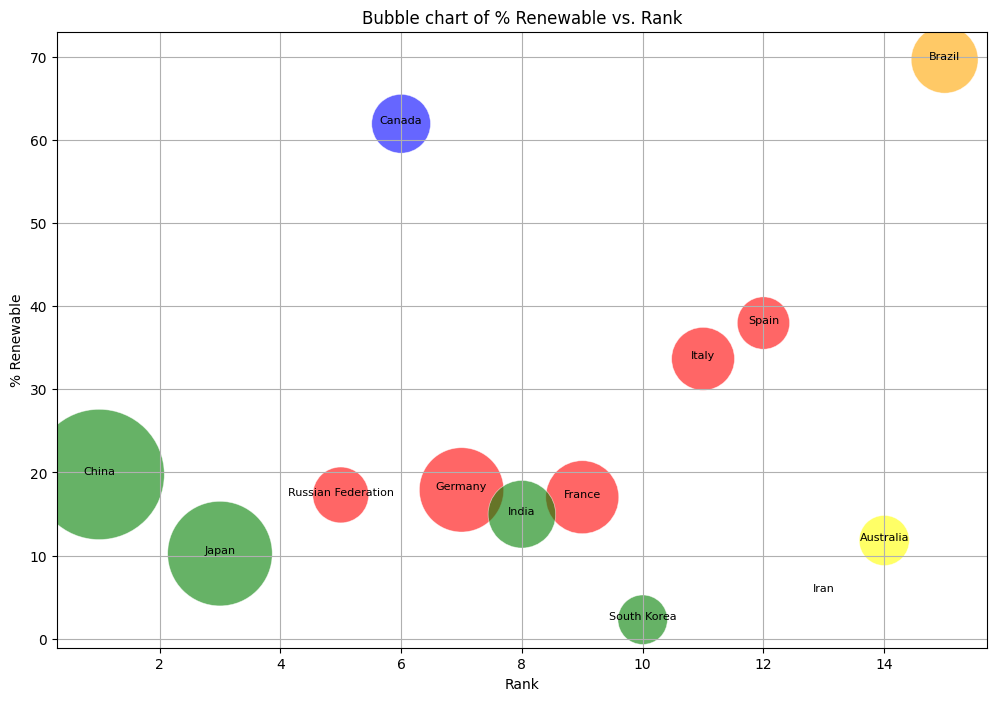

In [ ]:
import matplotlib.pyplot as plt


continent_colors = {
    'Asia': 'green',
    'North America': 'blue',
    'Europe': 'red',
    'Australia': 'yellow',
    'South America': 'orange'
}

final_df['Color'] = final_df['Continent'].map(continent_colors)
final_df['Size'] = final_df['2015'] / 1e9

plt.figure(figsize=(12, 8))
plt.scatter(final_df['Rank'], final_df['% Renewable'],
            s=final_df['Size'],
            c=final_df['Color'],
            alpha=0.6, edgecolors="w", linewidth=0.5)

for i, row in final_df.iterrows():
    plt.text(row['Rank'], row['% Renewable'], i, fontsize=8, ha='center')

plt.xlabel("Rank")
plt.ylabel("% Renewable")
plt.title("Bubble chart of % Renewable vs. Rank")
plt.grid(True)
plt.show()
